*ML PROJECT GRP 1 
SENTIMENT ANALYSIS OF SOCIAL MEDIA TWEETS USING MACHINE LEARNING TECHNIQUES*

**Data Cleaning and Preprocessing**

In [2]:
import pandas as pd
import re

# Load the dataset
file_path = r"C:\Users\varan\Downloads\Twitter.csv"  # Use the correct file path
df = pd.read_csv(file_path)  # Make sure the filename is in quotes

# Check the column names to ensure 'tweet' exists
print("Columns in dataset:", df.columns)

# Convert target values to binary (0 for negative, 1 for positive)
df['target'] = df['target'].apply(lambda x: 1 if x == 4 else 0)

# Function to clean each tweet
def clean_tweet(tweet):
    if not isinstance(tweet, str):
        return tweet  # If the tweet isn't a string, return it as is

    # Remove mentions (@user)
    tweet = re.sub(r'@\w+', '', tweet)
    
    # Remove hashtag symbol (#), but keep the text of the hashtag
    tweet = re.sub(r'#', '', tweet)
    
    # Remove URLs
    tweet = re.sub(r'http\S+', '', tweet)
    
    # Remove special characters and punctuation
    tweet = re.sub(r'[^\w\s]', '', tweet)
    
    # Remove emojis using a regex pattern for emoji characters
    tweet = re.sub(r'[^\x00-\x7F]+', '', tweet)  # This removes any non-ASCII characters, including emojis
    
    # Convert to lowercase
    tweet = tweet.lower()

    # Remove extra whitespace
    tweet = re.sub(r'\s+', ' ', tweet).strip()
    
    return tweet

# Apply the cleaning function to the 'tweet' column (if it exists)
if 'tweet' in df.columns:
    df['cleaned_tweet'] = df['tweet'].apply(clean_tweet)
else:
    raise ValueError("The dataset does not contain a column named 'tweet'.")

# Drop the original 'tweet' column
df = df.drop(columns=['tweet'])

# Check the DataFrame to confirm the 'tweet' column is removed
print("Columns after removing 'tweet':", df.columns)

# Check a sample of the cleaned data
print("Sample of cleaned data:")
print(df[['target', 'date', 'cleaned_tweet']].head())

# Save the cleaned data to a new CSV file
output_path = r"C:\Users\varan\Downloads\cleaned_Twitter.csv"
df.to_csv(output_path, index=False)

print(f"Cleaned data saved to {output_path}")


Columns in dataset: Index(['target', 'date', 'tweet'], dtype='object')
Columns after removing 'tweet': Index(['target', 'date', 'cleaned_tweet'], dtype='object')
Sample of cleaned data:
   target                          date  \
0       0  Mon Apr 06 22:19:45 PDT 2009   
1       0  Mon Apr 06 22:19:49 PDT 2009   
2       0  Mon Apr 06 22:19:53 PDT 2009   
3       0  Mon Apr 06 22:19:57 PDT 2009   
4       0  Mon Apr 06 22:19:57 PDT 2009   

                                       cleaned_tweet  
0  awww thats a bummer you shoulda got david carr...  
1  is upset that he cant update his facebook by t...  
2  i dived many times for the ball managed to sav...  
3     my whole body feels itchy and like its on fire  
4  no its not behaving at all im mad why am i her...  
Cleaned data saved to C:\Users\varan\Downloads\cleaned_Twitter.csv


<Axes: xlabel='target'>

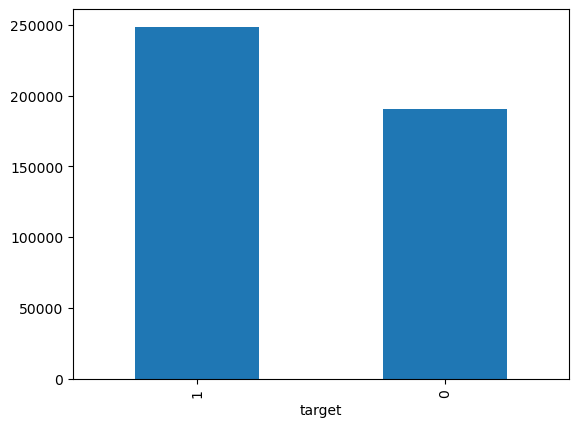

In [4]:
df['target'].value_counts().plot(kind='bar')


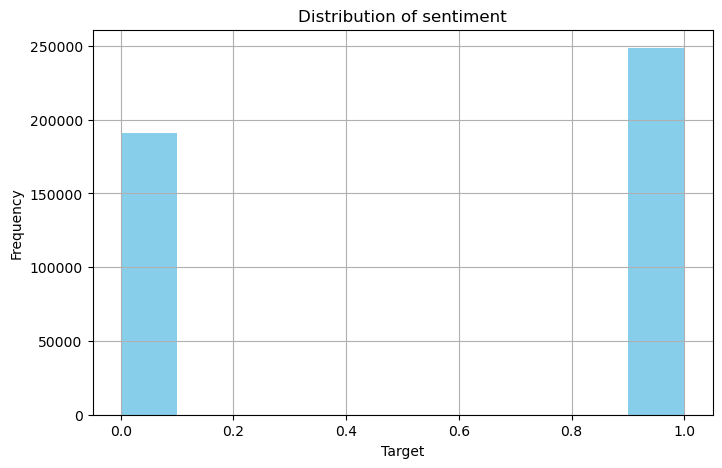

In [18]:
import matplotlib.pyplot as plt

# Histogram for numerical features
df['target'].hist(bins=10, figsize=(8, 5), color='skyblue')
plt.title('Distribution of sentiment')
plt.xlabel('Target')
plt.ylabel('Frequency')
plt.show()


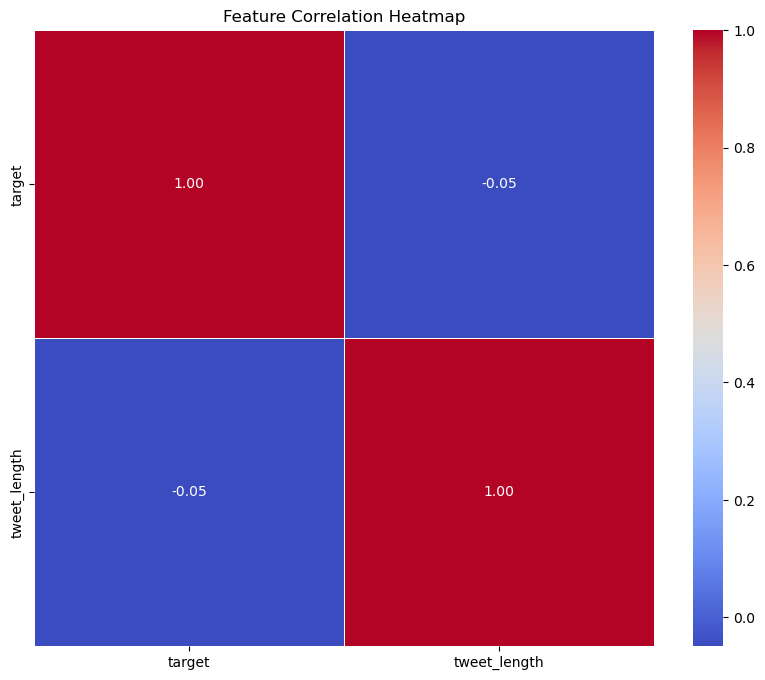

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame
# If your DataFrame contains non-numerical data, you can filter out non-numerical columns:
numerical_df = df.select_dtypes(include=['float64', 'int64'])

# Create the correlation matrix
corr_matrix = numerical_df.corr()

# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Feature Correlation Heatmap')
plt.show()


***Feature Extraction***

In [5]:
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer

# For example, top words for positive and negative tweets separately
vectorizer = CountVectorizer(stop_words='english', max_features=20)
vectorizer.fit(df[df['target'] == 1]['cleaned_tweet'])
print("Top words for positive tweets:", vectorizer.get_feature_names_out())


Top words for positive tweets: ['amp' 'day' 'dont' 'going' 'good' 'got' 'great' 'happy' 'im' 'just'
 'know' 'like' 'lol' 'love' 'morning' 'new' 'night' 'thanks' 'time'
 'today']


In [6]:
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer

# For example, top words for positive and negative tweets separately
vectorizer = CountVectorizer(stop_words='english', max_features=20)
vectorizer.fit(df[df['target'] == 0]['cleaned_tweet'])
print("Top words for negative tweets:", vectorizer.get_feature_names_out())


Top words for negative tweets: ['day' 'dont' 'going' 'good' 'got' 'home' 'im' 'just' 'know' 'like' 'miss'
 'need' 'really' 'sad' 'think' 'time' 'today' 'want' 'wish' 'work']


In [7]:
df['tweet_length'] = df['cleaned_tweet'].apply(len)
df.groupby('target')['tweet_length'].describe()


count       mean        std  min   25%   50%   75%    max
target                                                              
0       190750.0  64.316021  34.567481  0.0  36.0  60.0  92.0  159.0
1       248576.0  60.922555  33.961170  0.0  33.0  56.0  87.0  152.0

***Train set and Test set***

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(df['cleaned_tweet'], df['target'], test_size=0.2, random_state=42)

# Vectorize text using TF-IDF
tfidf = TfidfVectorizer(max_features=5000, stop_words='english')
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)


***MODELS***

**Logistic Regression**

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Train a Logistic Regression model
model = LogisticRegression()
model.fit(X_train_tfidf, y_train)

# Predict and evaluate
y_pred = model.predict(X_test_tfidf)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.7661552819065395
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.67      0.71     38045
           1       0.77      0.84      0.80     49821

    accuracy                           0.77     87866
   macro avg       0.77      0.75      0.76     87866
weighted avg       0.77      0.77      0.76     87866



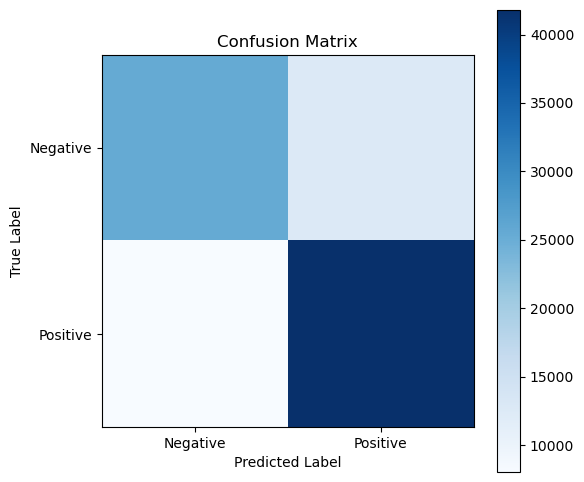

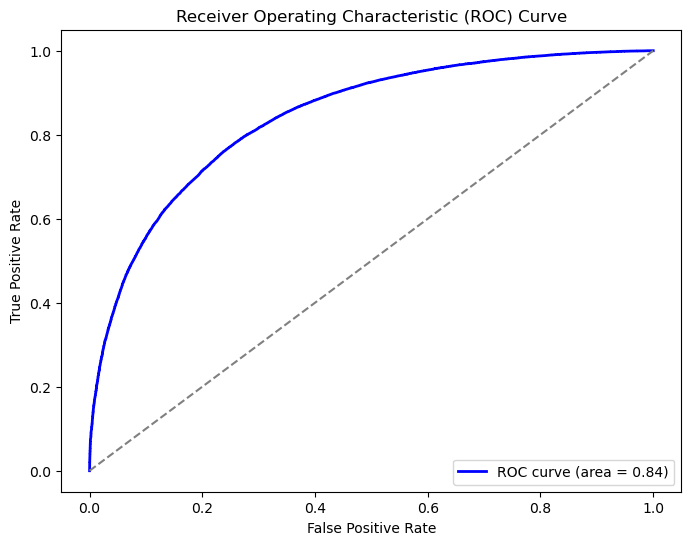

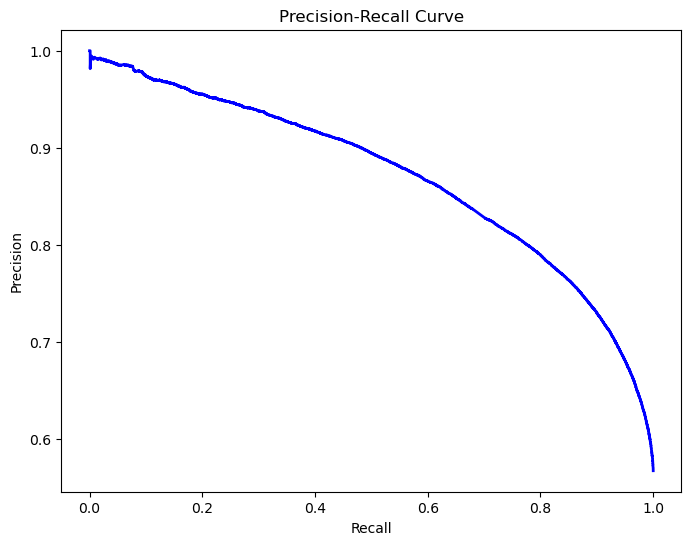

In [5]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve, auc, precision_recall_curve

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = range(len(cm))
plt.xticks(tick_marks, ['Negative', 'Positive'])
plt.yticks(tick_marks, ['Negative', 'Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# ROC Curve
y_prob = model.predict_proba(X_test_tfidf)[:, 1]  # Get probabilities for the positive class
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()


**Naive Bayes**

In [6]:
from sklearn.naive_bayes import MultinomialNB

# Train a Naive Bayes model
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)

# Predict on test set
y_pred_nb = nb_model.predict(X_test_tfidf)

# Evaluate Naive Bayes
print("Naive Bayes Model Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb))

Naive Bayes Model Performance:
Accuracy: 0.7547401725354517
              precision    recall  f1-score   support

           0       0.76      0.63      0.69     38045
           1       0.75      0.85      0.80     49821

    accuracy                           0.75     87866
   macro avg       0.76      0.74      0.74     87866
weighted avg       0.76      0.75      0.75     87866



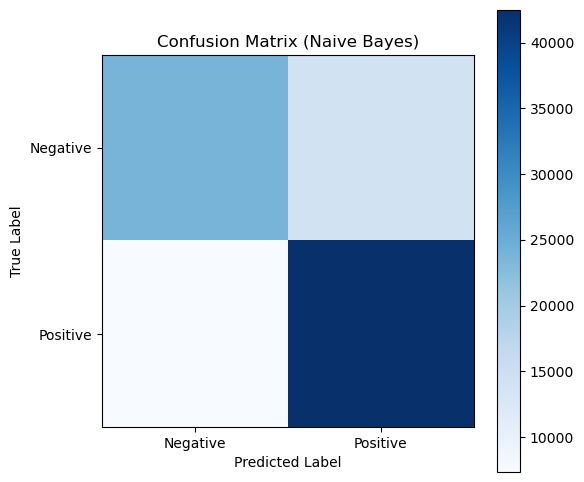

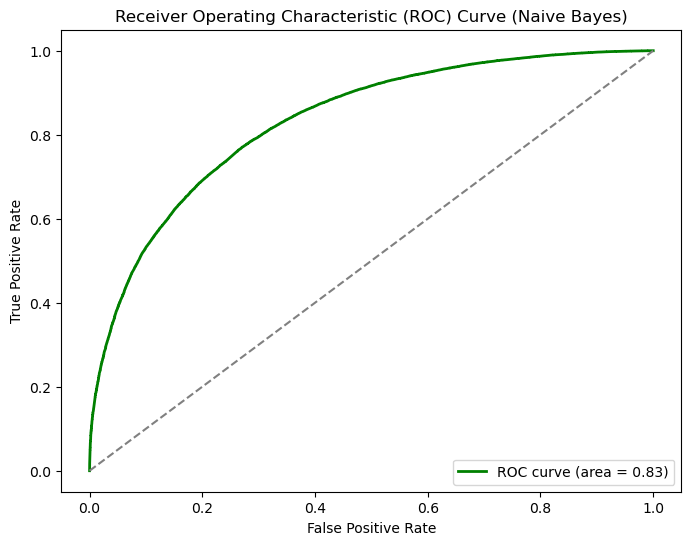

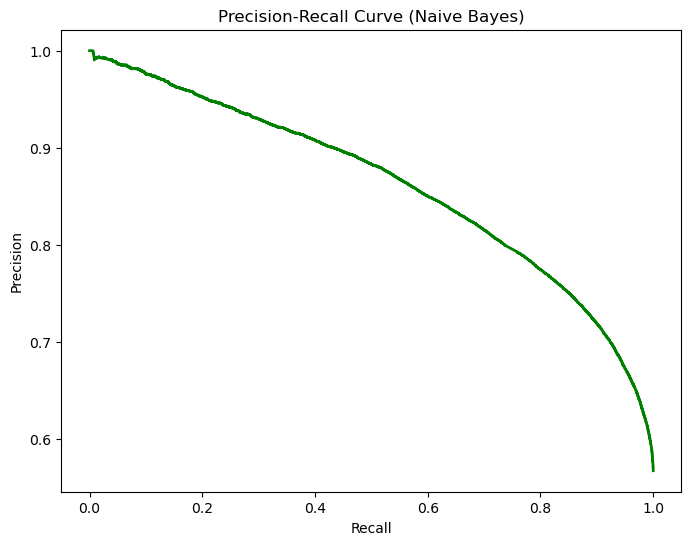

In [7]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve, auc, precision_recall_curve

# Confusion Matrix
cm_nb = confusion_matrix(y_test, y_pred_nb)
plt.figure(figsize=(6, 6))
plt.imshow(cm_nb, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix (Naive Bayes)')
plt.colorbar()
tick_marks = range(len(cm_nb))
plt.xticks(tick_marks, ['Negative', 'Positive'])
plt.yticks(tick_marks, ['Negative', 'Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# ROC Curve for Naive Bayes
y_prob_nb = nb_model.predict_proba(X_test_tfidf)[:, 1]  # Get probabilities for the positive class
fpr_nb, tpr_nb, _ = roc_curve(y_test, y_prob_nb)
roc_auc_nb = auc(fpr_nb, tpr_nb)
plt.figure(figsize=(8, 6))
plt.plot(fpr_nb, tpr_nb, color='green', lw=2, label=f'ROC curve (area = {roc_auc_nb:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve (Naive Bayes)')
plt.legend(loc='lower right')
plt.show()

# Precision-Recall Curve for Naive Bayes
precision_nb, recall_nb, _ = precision_recall_curve(y_test, y_prob_nb)
plt.figure(figsize=(8, 6))
plt.plot(recall_nb, precision_nb, color='green', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (Naive Bayes)')
plt.show()


**Support Vector Machine (SVM)**

In [8]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report

# Train a Support Vector Machine model
svm_model = LinearSVC()
svm_model.fit(X_train_tfidf, y_train)

# Predict on test set
y_pred_svm = svm_model.predict(X_test_tfidf)

# Evaluate Support Vector Machine
print("Support Vector Machine Model Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))


s:\Softwares\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Support Vector Machine Model Performance:
Accuracy: 0.764539184667562
              precision    recall  f1-score   support

           0       0.76      0.67      0.71     38045
           1       0.77      0.84      0.80     49821

    accuracy                           0.76     87866
   macro avg       0.76      0.75      0.76     87866
weighted avg       0.76      0.76      0.76     87866



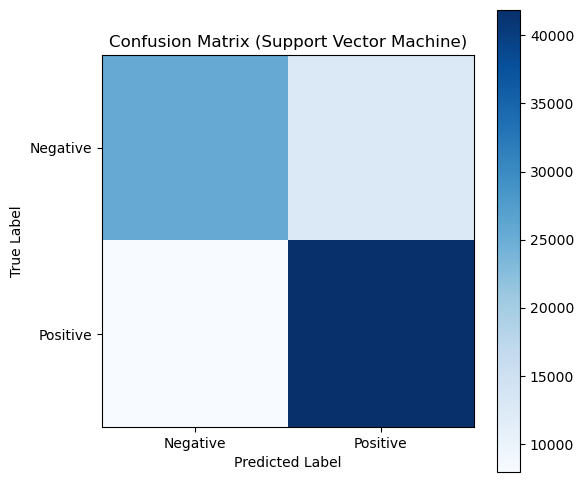

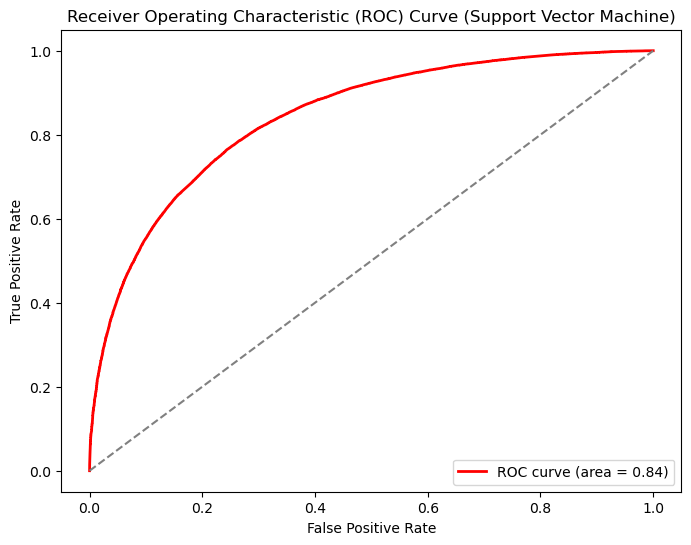

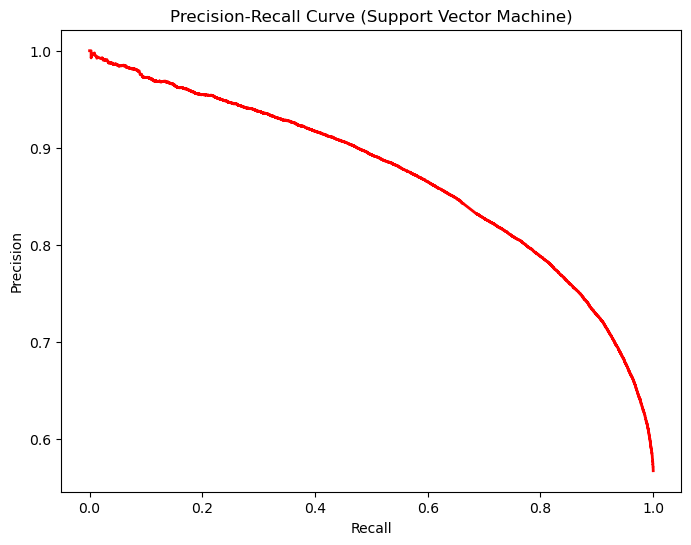

In [ ]:


import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve, auc, precision_recall_curve
from sklearn.calibration import CalibratedClassifierCV  # Import CalibratedClassifierCV


# Confusion Matrix for Support Vector Machine
cm_svm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(6, 6))
plt.imshow(cm_svm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix (Support Vector Machine)')
plt.colorbar()
tick_marks = range(len(cm_svm))
plt.xticks(tick_marks, ['Negative', 'Positive'])
plt.yticks(tick_marks, ['Negative', 'Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# ROC Curve for Support Vector Machine (If you have probabilities for SVM)
# ... (Your code to get probabilities for SVM, similar to y_prob for Logistic Regression) ...
calibrated_svm = CalibratedClassifierCV(svm_model, cv='prefit') # Create a calibrated classifier
calibrated_svm.fit(X_train_tfidf, y_train)  # Fit the calibrated classifier

y_prob_svm = calibrated_svm.predict_proba(X_test_tfidf)[:, 1]
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_prob_svm)
roc_auc_svm = auc(fpr_svm, tpr_svm)
plt.figure(figsize=(8, 6))
plt.plot(fpr_svm, tpr_svm, color='red', lw=2, label=f'ROC curve (area = {roc_auc_svm:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve (Support Vector Machine)')
plt.legend(loc='lower right')
plt.show()


# Precision-Recall Curve for Support Vector Machine (If you have probabilities for SVM)
precision_svm, recall_svm, _ = precision_recall_curve(y_test, y_prob_svm)
plt.figure(figsize=(8, 6))
plt.plot(recall_svm, precision_svm, color='red', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (Support Vector Machine)')
plt.show()

**LSTM**

In [9]:
!pip install tensorflow

     ---------------------------------------- 0.0/48.7 kB ? eta -:--:--
     ---------------------------------------- 48.7/48.7 kB 2.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/390.3 MB ? eta -:--:--
   ---------------------------------------- 0.5/390.3 MB 14.7 MB/s eta 0:00:27
   ---------------------------------------- 1.4/390.3 MB 18.2 MB/s eta 0:00:22
   ---------------------------------------- 2.3/390.3 MB 18.2 MB/s eta 0:00:22
   ---------------------------------------- 3.7/390.3 MB 23.8 MB/s eta 0:00:17
    --------------------------------------- 5.0/390.3 MB 22.8 MB/s eta 0:00:17
    --------------------------------------- 7.1/390.3 MB 25.1 MB/s eta 0:00:16
    --------------------------------------- 8.6/390.3 MB 26.1 MB/s eta 0:00:15
   - -------------------------------------- 10.1/390.3 MB 27.0 MB/s eta 0:00:15
   - -------------------------------------- 11.4/390.3 MB 29.7 MB/s eta 0:00:13
   - -------------------------------------- 12.7/390.3 MB 29.7 M

In [19]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from sklearn.metrics import classification_report, accuracy_score

# Tokenize and pad sequences
max_words = 5000  # Vocabulary size
max_len = 100     # Maximum length of sequences

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len)

# Build the LSTM Model
lstm_model = Sequential([
    Embedding(input_dim=max_words, output_dim=128, input_length=max_len),
    LSTM(128, dropout=0.2, recurrent_dropout=0.2),
    Dense(1, activation='sigmoid')
])

lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the LSTM Model
lstm_model.fit(X_train_pad, y_train, epochs=5, batch_size=32, validation_split=0.2)

# Evaluate the LSTM model
y_pred_lstm = (lstm_model.predict(X_test_pad) > 0.5).astype("int32")
print("LSTM Model Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_lstm))
print(classification_report(y_test, y_pred_lstm))


Epoch 1/5
8787/8787 ━━━━━━━━━━━━━━━━━━━━ 417s 47ms/step - accuracy: 0.7624 - loss: 0.4871 - val_accuracy: 0.8017 - val_loss: 0.4266
Epoch 2/5
8787/8787 ━━━━━━━━━━━━━━━━━━━━ 396s 45ms/step - accuracy: 0.8134 - loss: 0.4078 - val_accuracy: 0.8050 - val_loss: 0.4213
Epoch 3/5
8787/8787 ━━━━━━━━━━━━━━━━━━━━ 485s 55ms/step - accuracy: 0.8251 - loss: 0.3855 - val_accuracy: 0.8064 - val_loss: 0.4213
Epoch 4/5
8787/8787 ━━━━━━━━━━━━━━━━━━━━ 565s 64ms/step - accuracy: 0.8345 - loss: 0.3680 - val_accuracy: 0.8058 - val_loss: 0.4271
Epoch 5/5
8787/8787 ━━━━━━━━━━━━━━━━━━━━ 603s 69ms/step - accuracy: 0.8429 - loss: 0.3514 - val_accuracy: 0.8048 - val_loss: 0.4297
2746/2746 ━━━━━━━━━━━━━━━━━━━━ 60s 21ms/step
LSTM Model Performance:
Accuracy: 0.8062162838868276
              precision    recall  f1-score   support

           0       0.79      0.76      0.77     38045
           1       0.82      0.84      0.83     49821

    accuracy                           0.81     87866
   macro avg       0.80 

2746/2746 ━━━━━━━━━━━━━━━━━━━━ 53s 19ms/step


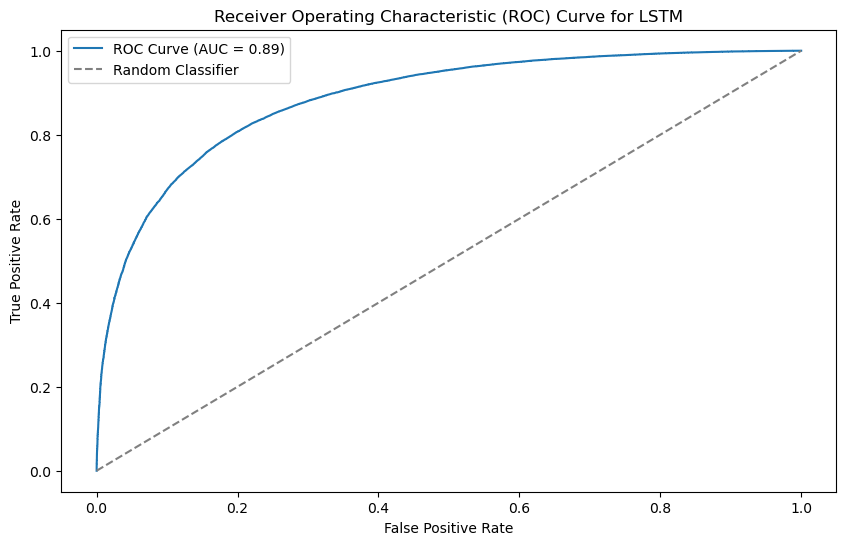

In [22]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred_lstm)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Negative', 'Positive'])
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix for LSTM')
plt.show()

from sklearn.metrics import roc_curve, roc_auc_score

# Calculate probabilities and ROC curve
y_prob = lstm_model.predict(X_test_pad).ravel()
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)

# Plot ROC Curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Classifier')
plt.title('Receiver Operating Characteristic (ROC) Curve for LSTM')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()



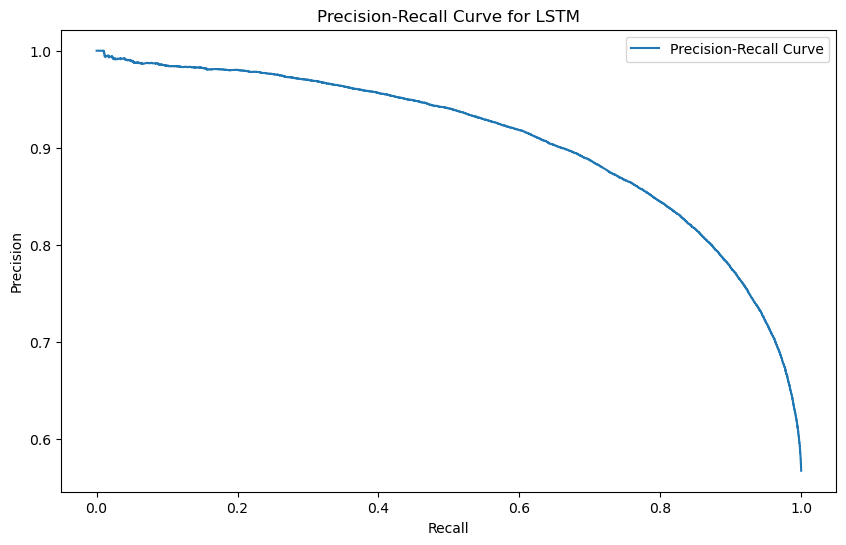

In [24]:
from sklearn.metrics import precision_recall_curve

# Calculate precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_prob)

# Plot Precision-Recall Curve
plt.figure(figsize=(10, 6))
plt.plot(recall, precision, label='Precision-Recall Curve')
plt.title('Precision-Recall Curve for LSTM')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.show()


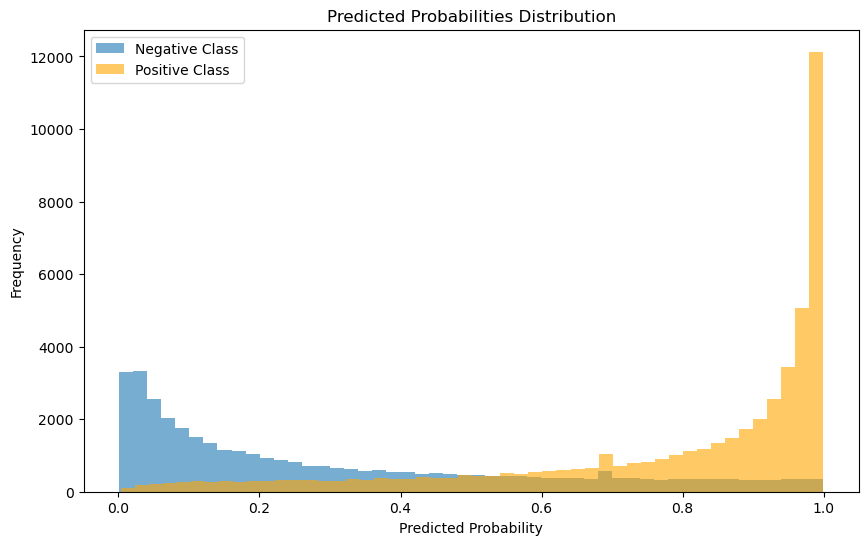

In [27]:
# Plot distribution of predicted probabilities
plt.figure(figsize=(10, 6))
plt.hist(y_prob[y_test == 0], bins=50, alpha=0.6, label='Negative Class')
plt.hist(y_prob[y_test == 1], bins=50, alpha=0.6, label='Positive Class', color='orange')
plt.title('Predicted Probabilities Distribution')
plt.xlabel('Predicted Probability')
plt.ylabel('Frequency')
plt.legend()
plt.show()


**XGBoost**

In [8]:
!pip install xgboost

   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB 991.0 kB/s eta 0:02:07
   ---------------------------------------- 0.1/124.9 MB 1.3 MB/s eta 0:01:36
   ---------------------------------------- 0.4/124.9 MB 2.8 MB/s eta 0:00:45
    --------------------------------------- 1.6/124.9 MB 8.8 MB/s eta 0:00:15
   - -------------------------------------- 3.5/124.9 MB 14.7 MB/s eta 0:00:09
   - -------------------------------------- 5.1/124.9 MB 18.1 MB/s eta 0:00:07
   - -------------------------------------- 5.8/124.9 MB 18.5 MB/s eta 0:00:07
   - -------------------------------------- 5.9/124.9 MB 15.8 MB/s eta 0:00:08
   - -------------------------------------- 6.2/124.9 MB 15.8 MB/s eta 0:00:08
   -- ------------------------------------- 6.5/124.9 MB 14.8 MB/s eta 0:00:08
   -- ------------------------------------- 6.8/124.9 MB 14.1 MB/s eta 0:00:09
   -- ------------------------------------- 7.0/124.9 MB 12.9 

In [10]:
from sklearn.metrics import accuracy_score, classification_report
from xgboost import XGBClassifier

# Train the model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train_tfidf, y_train)

# Predict and evaluate
y_pred_xgb = xgb_model.predict(X_test_tfidf)
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))


s:\Softwares\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:03:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.7346527667129492
              precision    recall  f1-score   support

           0       0.78      0.54      0.64     38045
           1       0.72      0.88      0.79     49821

    accuracy                           0.73     87866
   macro avg       0.75      0.71      0.71     87866
weighted avg       0.74      0.73      0.72     87866



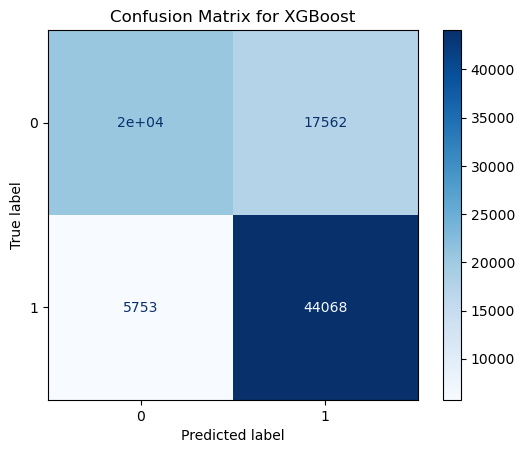

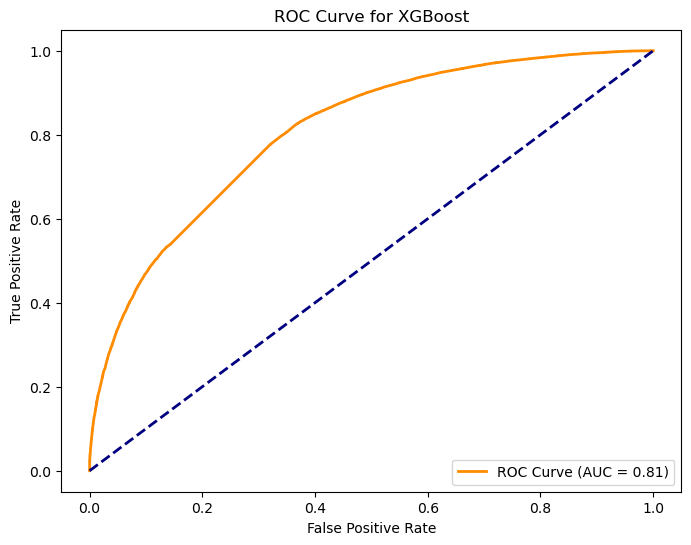

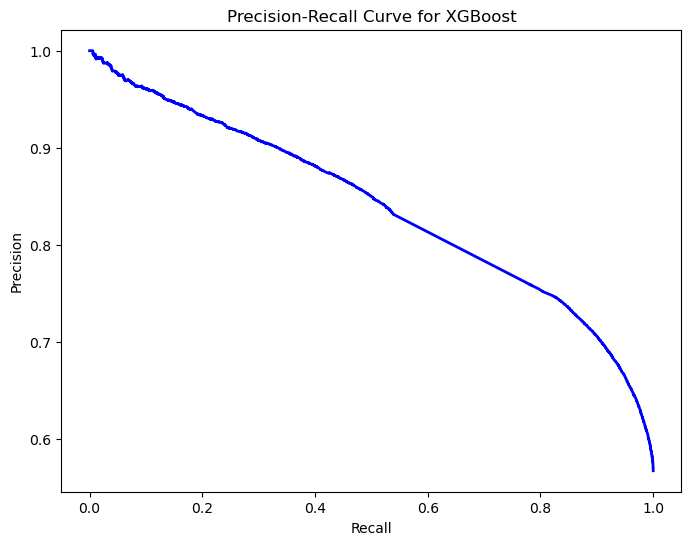

In [11]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_xgb)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=xgb_model.classes_)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix for XGBoost')
plt.show()

from sklearn.metrics import roc_curve, auc

# Predict probabilities
y_proba_xgb = xgb_model.predict_proba(X_test_tfidf)[:, 1]

# Compute ROC curve
fpr, tpr, _ = roc_curve(y_test, y_proba_xgb)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.title('ROC Curve for XGBoost')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()


from sklearn.metrics import precision_recall_curve

# Compute precision-recall curve
precision, recall, _ = precision_recall_curve(y_test, y_proba_xgb)

# Plot precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=2)
plt.title('Precision-Recall Curve for XGBoost')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()


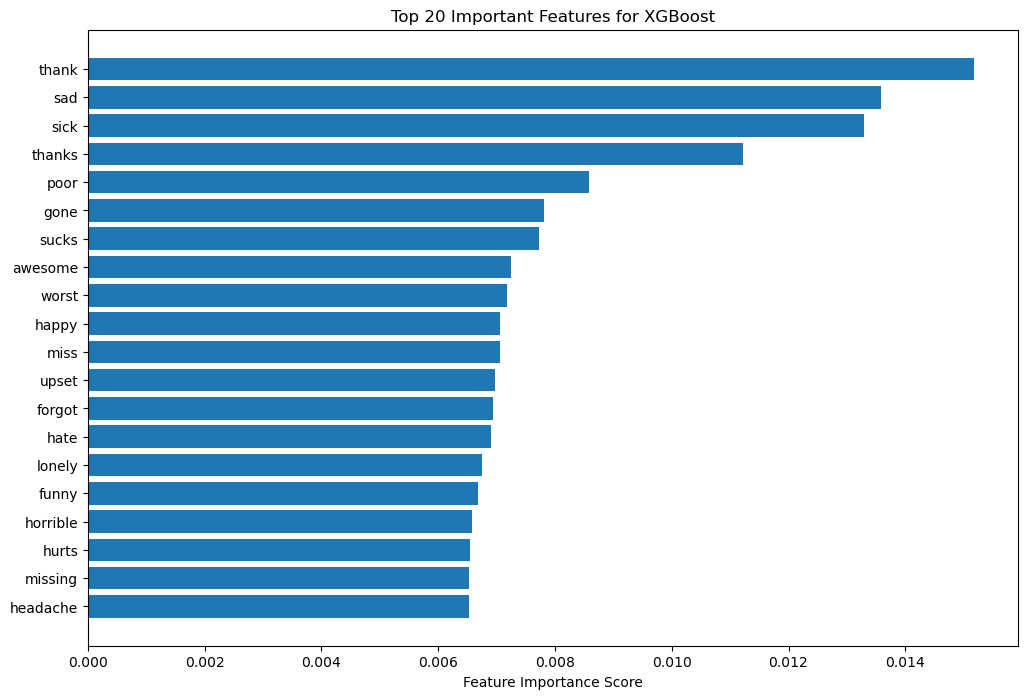

In [12]:
import numpy as np

# Get feature importances
feature_importances = xgb_model.feature_importances_

# Sort features by importance
sorted_idx = np.argsort(feature_importances)[-20:]  # Top 20 features

# Plot feature importances
plt.figure(figsize=(12, 8))
plt.barh(range(len(sorted_idx)), feature_importances[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), [tfidf.get_feature_names_out()[i] for i in sorted_idx])
plt.xlabel('Feature Importance Score')
plt.title('Top 20 Important Features for XGBoost')
plt.show()


**LightGBM**

In [12]:
!pip install lightgbm

   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   - -------------------------------------- 0.1/1.4 MB 1.7 MB/s eta 0:00:01
   --------------- ------------------------ 0.6/1.4 MB 7.0 MB/s eta 0:00:01
   ---------------------------------------- 1.4/1.4 MB 11.5 MB/s eta 0:00:00


In [13]:
from sklearn.metrics import accuracy_score, classification_report
from lightgbm import LGBMClassifier

# Train the model
lgb_model = LGBMClassifier(random_state=42)
lgb_model.fit(X_train_tfidf, y_train)

# Predict and evaluate
y_pred_lgb = lgb_model.predict(X_test_tfidf)
print("Accuracy:", accuracy_score(y_test, y_pred_lgb))
print(classification_report(y_test, y_pred_lgb))


s:\Softwares\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "s:\Softwares\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "s:\Softwares\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "s:\Softwares\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "s:\Softwares\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,
                       ^^^^^^^^^^^^^^

[LightGBM] [Info] Number of positive: 198755, number of negative: 152705
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 1.493883 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 234685
[LightGBM] [Info] Number of data points in the train set: 351460, number of used features: 5000
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.565512 -> initscore=0.263565
[LightGBM] [Info] Start training from score 0.263565
Accuracy: 0.7379873898891494
              precision    recall  f1-score   support

           0       0.77      0.56      0.65     38045
           1       0.72      0.88      0.79     49821

    accuracy                           0.74     87866
   macro avg       0.75      0.72      0.72     87866
weighted avg       0.74      0.74      0.73     87866



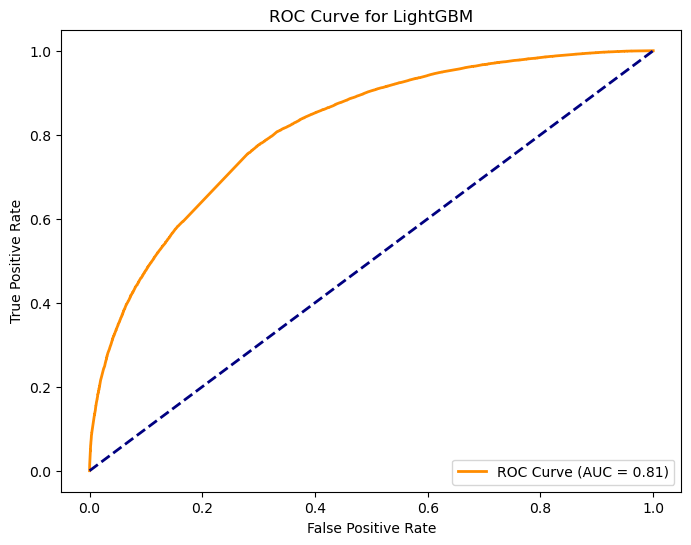

In [14]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_lgb)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=lgb_model.classes_)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix for LightGBM')
plt.show()


from sklearn.metrics import roc_curve, auc

# Predict probabilities
y_proba_lgb = lgb_model.predict_proba(X_test_tfidf)[:, 1]

# Compute ROC curve
fpr, tpr, _ = roc_curve(y_test, y_proba_lgb)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.title('ROC Curve for LightGBM')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()


from sklearn.metrics import precision_recall_curve

# Compute precision-recall curve
precision, recall, _ = precision_recall_curve(y_test, y_proba_lgb)

# Plot precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=2)
plt.title('Precision-Recall Curve for LightGBM')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()


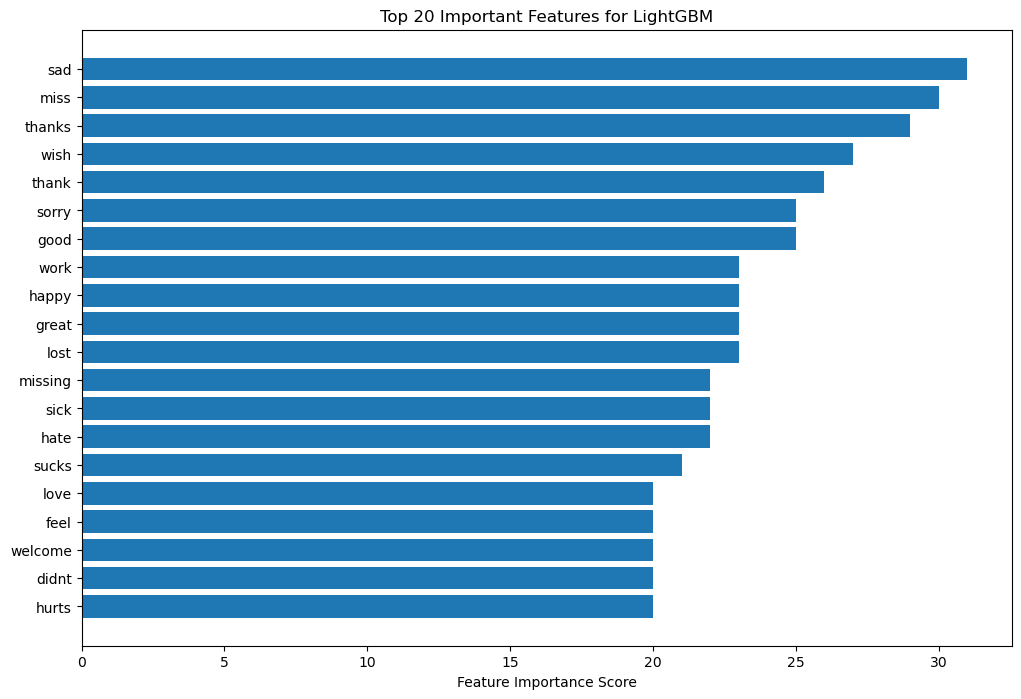

In [15]:
import numpy as np

# Get feature importances
feature_importances = lgb_model.feature_importances_

# Sort features by importance
sorted_idx = np.argsort(feature_importances)[-20:]  # Top 20 features

# Plot feature importances
plt.figure(figsize=(12, 8))
plt.barh(range(len(sorted_idx)), feature_importances[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), [tfidf.get_feature_names_out()[i] for i in sorted_idx])
plt.xlabel('Feature Importance Score')
plt.title('Top 20 Important Features for LightGBM')
plt.show()


In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd

# Define the models
models = [
    ("Logistic Regression", LogisticRegression()),
    ("Naive Bayes", MultinomialNB()),
    ("Support Vector Machine", LinearSVC()),
    ("XGBoost", XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)),
    ("LightGBM", LGBMClassifier(random_state=42))
]

# Initialize an empty dictionary to store the results
results = {}

# Train and evaluate each model
for name, model in models:
    # Train the model
    model.fit(X_train_tfidf, y_train)

    # Predict on the test set
    y_pred = model.predict(X_test_tfidf)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # Get classification report
    report = classification_report(y_test, y_pred, output_dict=True)

    # Store the results (accuracy + classification report metrics)
    results[name] = {
        "Accuracy": accuracy,
        "Precision (Class 1)": report['1']['precision'],
        "Recall (Class 1)": report['1']['recall'],
        "F1-Score (Class 1)": report['1']['f1-score']
    }

# Convert the results into a Pandas DataFrame for easier comparison
results_df = pd.DataFrame(results).T

# Display the comparison
print("Model Comparison:")
print(results_df)

# Optional: Save the comparison as a CSV file
results_df.to_csv("model_comparison_results.csv", index=True)


s:\Softwares\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
s:\Softwares\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:05:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 198755, number of negative: 152705
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 1.921687 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 234685
[LightGBM] [Info] Number of data points in the train set: 351460, number of used features: 5000
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.565512 -> initscore=0.263565
[LightGBM] [Info] Start training from score 0.263565
Model Comparison:
                        Accuracy  Precision (Class 1)  Recall (Class 1)  \
Logistic Regression     0.766155             0.769508          0.838843   
Naive Bayes             0.754740             0.749422          0.852492   
Support Vector Machine  0.764539             0.766874          0.840128   
XGBoost                 0.734653             0.715041          0.884527   
LightGBM                0.737987            

**MODEL COMPARISIONS**

C:\Users\varan\AppData\Local\Temp\ipykernel_21068\2834681117.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(results_df.index, rotation=45)
C:\Users\varan\AppData\Local\Temp\ipykernel_21068\2834681117.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(results_df.index, rotation=45)
C:\Users\varan\AppData\Local\Temp\ipykernel_21068\2834681117.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(results_df.index, rotation=45)
C:\Users\varan\AppData\Local\Temp\ipykernel_21068\2834681117.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(results_df.index, rotation=45)


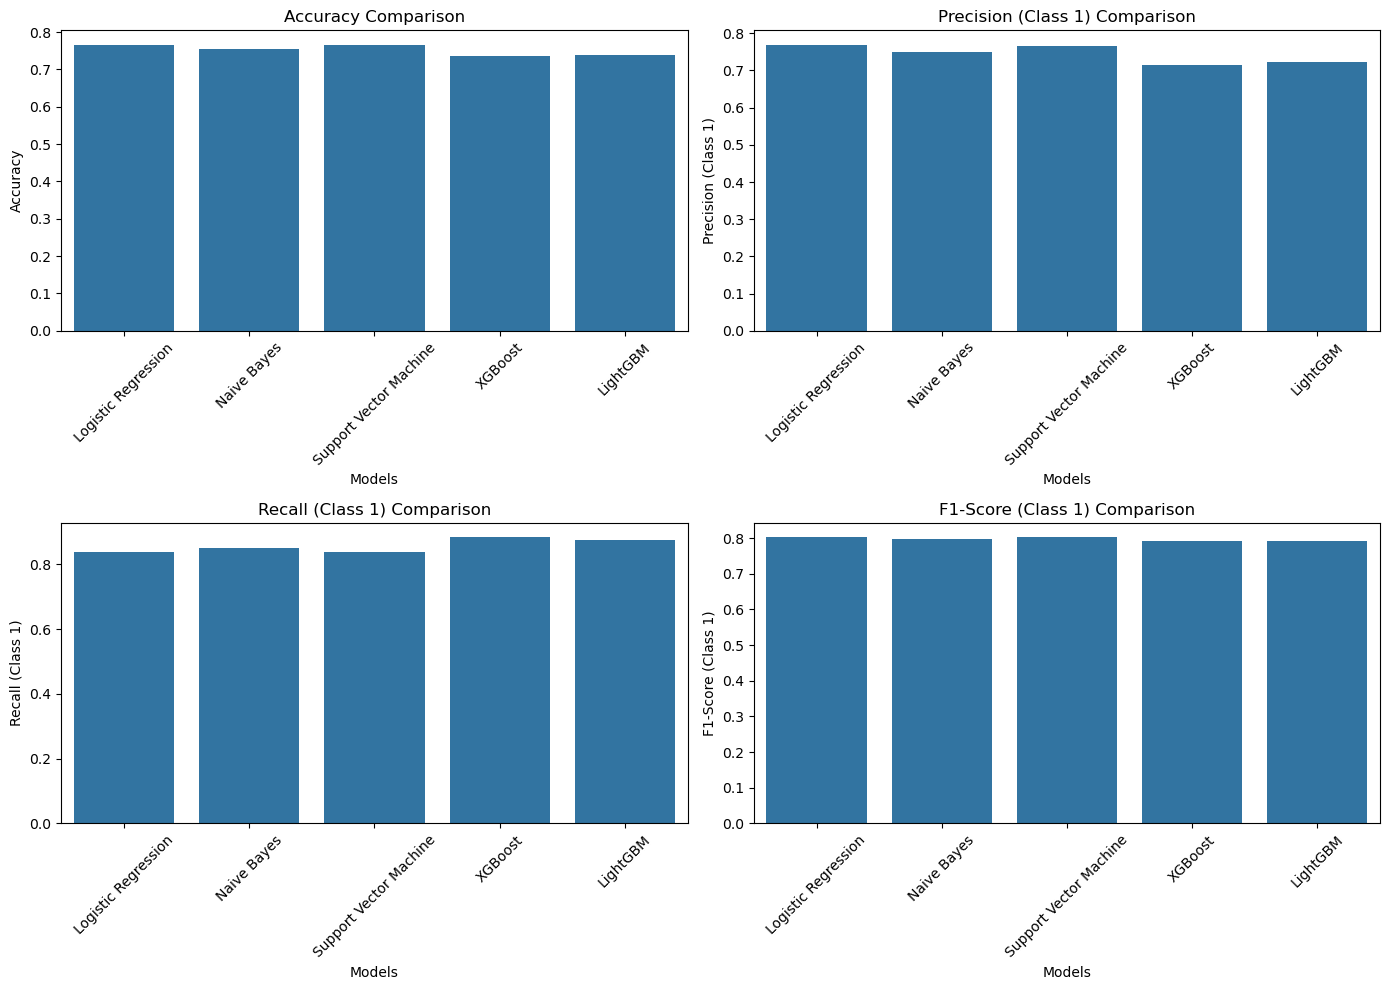

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
# Create a DataFrame for results
metrics = ["Accuracy", "Precision (Class 1)", "Recall (Class 1)", "F1-Score (Class 1)"]

# Create subplots for comparison
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

for idx, metric in enumerate(metrics):
    ax = axes[idx // 2, idx % 2]
    sns.barplot(x=results_df.index, y=results_df[metric], ax=ax)
    ax.set_title(f'{metric} Comparison')
    ax.set_ylabel(metric)
    ax.set_xlabel('Models')
    ax.set_xticklabels(results_df.index, rotation=45)

plt.tight_layout()
plt.show()

